PROGRAM TO PREDICT STOCK PRICES FOR THE NEXT 30 DAYS USING LINEAR REGRESSION AND SUPPORT VECTOR MACHINES

In [59]:
#importing all libraries and extensions
import quandl
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline



In [33]:
# getting data using quandl API
df=quandl.get('WIKI/CRM')
print(df.head())


             Open   High     Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2004-06-23  15.00  17.30  14.750  17.20  10893600.0          0.0          1.0   
2004-06-24  17.55  17.69  16.500  16.76   2221800.0          0.0          1.0   
2004-06-25  16.51  16.75  15.790  15.80   1677500.0          0.0          1.0   
2004-06-28  16.00  16.21  15.436  16.00    567700.0          0.0          1.0   
2004-06-29  16.00  16.70  15.830  16.40    528000.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2004-06-23     3.7500     4.3250    3.6875        4.30   43574400.0  
2004-06-24     4.3875     4.4225    4.1250        4.19    8887200.0  
2004-06-25     4.1275     4.1875    3.9475        3.95    6710000.0  
2004-06-28     4.0000     4.0525    3.8590        4.00    2270800.0  
2004-06-29  

In [34]:
#get the adjusted close price
df=df[['Adj. Close']]
#now print new data
print(df.head())

            Adj. Close
Date                  
2004-06-23        4.30
2004-06-24        4.19
2004-06-25        3.95
2004-06-28        4.00
2004-06-29        4.10


In [44]:
#variable for predicting n days out into future
forecast_out=30
#create another column (target or dependent variable) shifted in n units
df['Prediction']=df[['Adj. Close']].shift(-forecast_out)
print(df.tail())


            Adj. Close  Prediction
Date                              
2018-03-21      121.70         NaN
2018-03-22      118.04         NaN
2018-03-23      114.43         NaN
2018-03-26      118.97         NaN
2018-03-27      113.81         NaN


In [49]:
#create independent data set(x)
df=df.dropna()
x=df['Adj. Close'].values
#remove the last 'n' rows
x=x[:-forecast_out]
print(x) 

[  4.3    4.19   3.95 ... 102.54 102.65 102.79]


In [51]:
###create the dependent data set (y)
#convert dataframe to numpyarray
y=df['Prediction'].values
y=y[:-forecast_out]
print(y)

[  2.725    2.6925   2.7475 ... 104.03   106.98   108.55  ]


In [38]:
#data splitting for regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
#create and train support vector classifier
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train)


SVR(C=1000.0, gamma=0.1)

In [40]:
#testing model best score is 1
svm_confidence=svr_rbf.score(x_test,y_test)
print('svm confidence',svm_confidence)


svm confidence 0.9975301965331458


In [23]:
#create and train linear regression model
linreg=LinearRegression()
linreg.fit(x_train,y_train)
#testing model
linreg_confidence=linreg.score(x_test,y_test)
print('lr confidence',linreg_confidence)


lr confidence 1.0


In [54]:
X_forecast=np.array(df)[-forecast_out:]
print(X_forecast)

[[102.23 107.69]
 [104.41 109.02]
 [105.29 113.12]
 [106.68 112.86]
 [108.1  114.35]
 [108.86 114.48]
 [109.15 113.  ]
 [108.8  114.96]
 [109.1  116.65]
 [110.24 116.47]
 [108.89 116.25]
 [110.04 119.43]
 [111.77 121.92]
 [111.93 122.5 ]
 [112.89 124.48]
 [113.24 125.33]
 [112.85 126.36]
 [111.96 127.41]
 [113.7  126.78]
 [113.3  126.73]
 [112.23 127.99]
 [113.91 127.22]
 [112.74 125.97]
 [110.78 124.98]
 [107.65 125.12]
 [109.57 121.7 ]
 [110.05 118.04]
 [104.03 114.43]
 [106.98 118.97]
 [108.55 113.81]]


In [55]:
linreg_prediction=linreg.predict(X_forecast)
print(linreg_prediction)

[107.69 109.02 113.12 112.86 114.35 114.48 113.   114.96 116.65 116.47
 116.25 119.43 121.92 122.5  124.48 125.33 126.36 127.41 126.78 126.73
 127.99 127.22 125.97 124.98 125.12 121.7  118.04 114.43 118.97 113.81]


In [56]:
svm_prediction=svr_rbf.predict(X_forecast)
print(svm_prediction)

[107.58962539 109.02933412 113.07730225 112.96032797 114.25029055
 114.38248514 112.90009465 115.06041453 116.75007076 116.37001085
 116.24841773 117.89319188 121.8200953  122.59991367 124.58010601
 125.22972133 126.8869466  127.31001081 126.88020602 127.67250808
 127.9284107  127.11970462 126.06984447 124.88030604 125.01992746
 121.60002383 117.94011664 114.33009722  88.09797466 113.90981889]


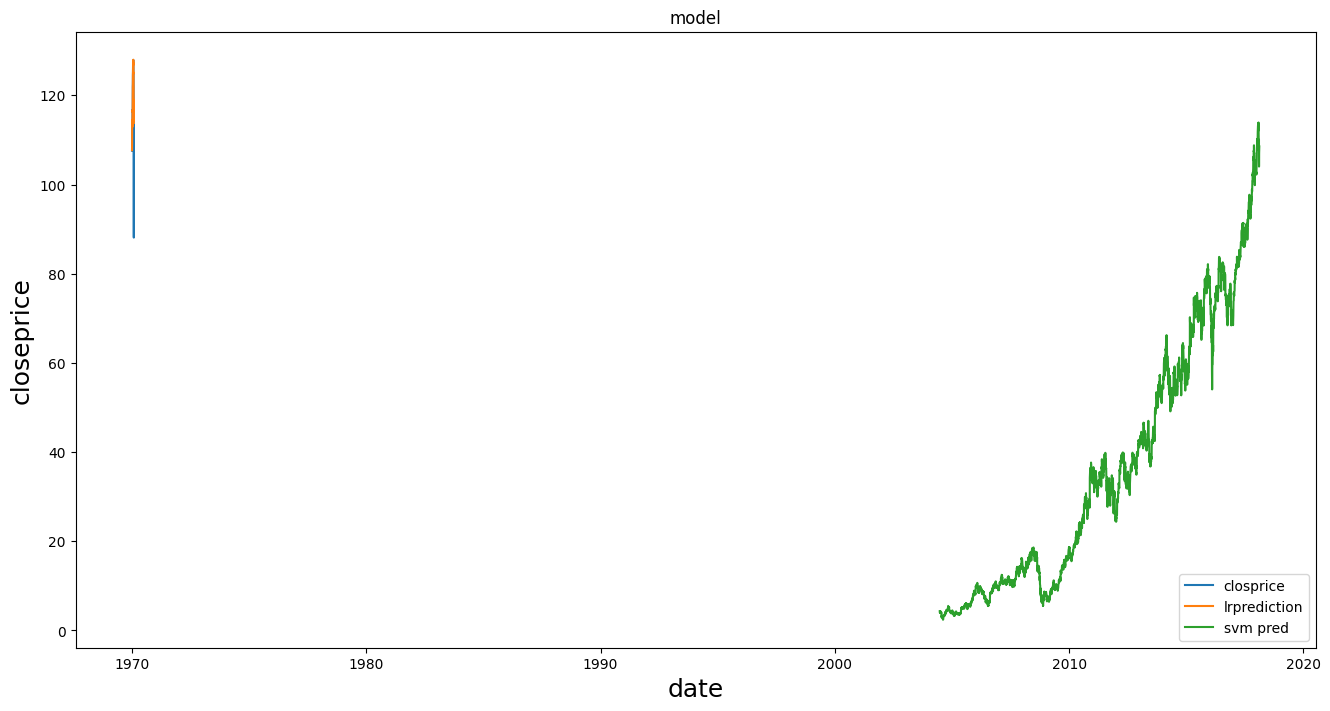

In [67]:
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date',fontsize=18)
plt.ylabel('closeprice',fontsize=18)

plt.plot(linreg_prediction)
plt.plot(df['Adj. Close'])
plt.legend(['closprice','lrprediction','svm pred'],loc='lower right')
plt.show()